In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [71]:
# tao ngau nhien cac diem tren truc toa do theo phan phoi chuan
# np.multivariate_normal(mean, cov, size)
means = [[2,2], [8,3], [3, 6]]
# ma tran hiep phuong sai
cov = [[1,0], [0,1]]
# so diem muon tao
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
# ghep cac diem da tao tren cung 1 he toa do
X = np.concatenate((X0, X1, X2), axis = 0)
print(X)
print(X.shape[0])
# tao 1 mang cac label
# np.asarray(data, dtype = none, order = none, like = none) : convert input into array
# input can be: lists, lists of tuples, tuples, tuples of tuples, tuples of lists and ndarrays.
original_label = np.asarray([0]*N + [1]*N + [2]*N).T
K = 3

[[0.82921432 3.77394547]
 [2.65040276 1.73231206]
 [4.22588979 2.092322  ]
 ...
 [3.78871462 5.68599295]
 [2.38008803 6.64388024]
 [3.18832155 6.86974184]]
1500



<div style="font-size: 20px; color: yellow">
    HIỂN THỊ TRÊN ĐỒ THỊ
</div>

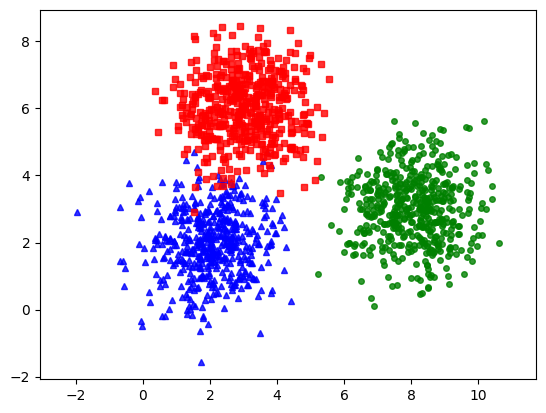

In [68]:
def kmeans_display(X, label):
    # np.amax: get the max value of array
    K = np.amax(label) + 1
    # lay 500 phan tu dau tien, ung voi label 0
    X0 = X[label == 0, :]
    # tuong tu, label 1
    X1 = X[label == 1, :]
    # label 2
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

<div style="font-size: 15px; color: orange">
    <div>-   Buớc 1:</div>
    <div>-   Buớc 2:</div>
    <div>-   Buớc 3:</div>
    <div>-   Buớc 4:</div>
</div>

In [ ]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [73]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

In [74]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

NameError: name 'kmeans_init_centers' is not defined